# COVID-19 Clusters Data

The Metro Public Health Department tracks COVID-19 clusters. The files `clusters.csv` and `clusters_by_type.csv` contain the tables of clusters as reported by [WSMV](https://www.wsmv.com/news/metro-health-releases-latest-covid-19-clusters/article_ef554e08-1558-11eb-b290-873345e174d7.html) along with the coordinates of the clusters. Can you find any connection between the reported COVID violations and subsequent COVID clusters?

In [1]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# display settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Read in and explore the COVID-19 clusters dataframes

In [3]:
# Read this in as a normal dataframe first
clusters = pd.read_csv('../data/clusters.csv')
clusters.head()

,Cluster Name,Facility Type,Cluster Start Date,# Cases,Latitude,Longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.844583
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.817345
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.754560


In [4]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cluster Name        62 non-null     object 
 1   Facility Type       62 non-null     object 
 2   Cluster Start Date  62 non-null     object 
 3   # Cases             62 non-null     int64  
 4   Latitude            51 non-null     float64
 5   Longitude           51 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.0+ KB


In [5]:
clusters.columns = ['cluster_name', 'type', 'start_date', 'case_count', 'lat', 'long']
clusters.head()

,cluster_name,type,start_date,case_count,lat,long
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.844583
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.817345
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.754560


In [6]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cluster_name  62 non-null     object 
 1   type          62 non-null     object 
 2   start_date    62 non-null     object 
 3   case_count    62 non-null     int64  
 4   lat           51 non-null     float64
 5   long          51 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.0+ KB


In [7]:
# Large clusters without lat/long coordinates
clusters[clusters['lat'].isna() == True]

,cluster_name,type,start_date,case_count,lat,long
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
13,Apartments A,Other,5/6/2020,20,NaN,NaN
15,Grand Hyatt Hotel (Power Design Inc) job site,Construction,5/19/2020,23,NaN,NaN
20,Broad West Construction,Construction,6/12/2020,34,NaN,NaN
22,Wedding at Farm (Out of County),Social Gathering,6/19/2020,15,NaN,NaN
47,Holiday Party,Social Gathering,8/20/2020,11,NaN,NaN
51,University Sports Team B,College / University,9/2/2020,10,NaN,NaN
53,Tennessee Titans,Other,9/12/2020,23,NaN,NaN
54,Middle TN Community Homes,Congregate Living,9/14/2020,25,NaN,NaN
55,High/Middle-School Teen Party,Social Gathering,9/16/2020,13,NaN,NaN


_Of the 62 10+ people clusters named and recorded in the dataset, the 11 listed above do not have any associated coordinates and cannot be mapped._

In [8]:
# Clean up data types in the clusters dataframe
clusters.start_date = pd.to_datetime(clusters['start_date'], errors = 'raise')
# # Not necessary anymore
# clusters.long = clusters.long.str.replace(',','')
# clusters.long = pd.to_numeric(clusters['long'], errors = 'raise')
# clusters.long.unique()

In [9]:
# Check that the datatypes look good
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   cluster_name  62 non-null     object        
 1   type          62 non-null     object        
 2   start_date    62 non-null     datetime64[ns]
 3   case_count    62 non-null     int64         
 4   lat           51 non-null     float64       
 5   long          51 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.0+ KB


In [10]:
# What is the smallest cluster?
clusters.case_count.min()

10

In [11]:
clusters.to_csv('../data/clusters_cleaned.csv')

In [12]:
# See how many large clusters are identified by type
big_clusters = clusters.type.value_counts().to_frame()
big_clusters

,type
LTCF,20
Congregate Living,8
Bar,6
Correctional Facility,6
Social Gathering,6
Construction,5
Other,3
Commercial-Warehouse,2
Church,1
Office,1


In [13]:
# Make the index a column
big_clusters.reset_index(inplace = True)
big_clusters.columns

Index(['index', 'type'], dtype='object')

In [14]:
# Rename the type and cluster_count columns
big_clusters = big_clusters.rename(columns = {'type' : 'cluster_count', 'index':'type'})
big_clusters.columns

Index(['type', 'cluster_count'], dtype='object')

In [15]:
# Check to make sure it looks right
big_clusters.head()

,type,cluster_count
0,LTCF,20
1,Congregate Living,8
2,Bar,6
3,Correctional Facility,6
4,Social Gathering,6


### Read in the Clusters by Type dataframe

In [16]:
# Since there are no coordinates, just read this in as a normal pandas dataframe
clusters_by_type = pd.read_csv('../data/clusters_by_type.csv')
clusters_by_type.head()

,Cluster Type,Number of Clusters
0,Bar,7
1,Church,2
2,College / University,5
3,Commercial-Warehouse,12
4,Congregate Living,13


In [17]:
clusters_by_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cluster Type        18 non-null     object
 1   Number of Clusters  18 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [18]:
# Update the column names
clusters_by_type.columns = ['type', 'cluster_count']
clusters_by_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   type           18 non-null     object
 1   cluster_count  18 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [19]:
# Compare the cluster types in the two dataframes
print(clusters.sort_values('type').type.unique())
print(clusters_by_type.sort_values('type').type.unique())

['Bar' 'Church' 'College / University' 'Commercial-Warehouse'
 'Congregate Living' 'Construction' 'Correctional Facility' 'Gym' 'LTCF'
 'Office' 'Other' 'Restaurant' 'School' 'Social Gathering']
['Bar' 'Church' 'College / University' 'Commercial-Warehouse'
 'Congregate Living' 'Construction' 'Correctional Facility' 'Day Care'
 'Food Production' 'Grocery' 'Gym' 'Healthcare, non-LTCF' 'LTCF' 'Office'
 'Other' 'Restaurant' 'School' 'Social Gathering']


The list looks largely the same, though there are some cluster types that are not represented in the individual `clusters` dataset. Based on my understanding of COVID-19 data aggregation practices and the WSMV statement that only clusters of 10+ individuals are identified, I assume that the clusters represented in the `clusters` dataset are all of those that are `>= 10 cases` to protect the privacy of individuals diagnosed with COVID-19 in small clusters.

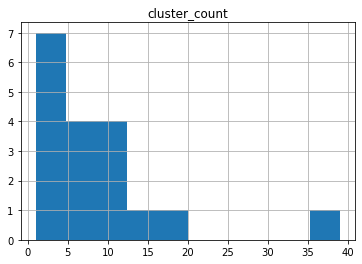

In [20]:
# Take a look at the distribution of clusters by type
clusters_by_type.hist();

In [21]:
# Which type of facility is the outlier in terms of number of clusters? LTCF
clusters_by_type[clusters_by_type['cluster_count'] > 20]

,type,cluster_count
12,LTCF,39


In [22]:
# Merge the big cluster counts with the clusters_by_type dataframe
clusters_by_type = clusters_by_type.merge(big_clusters, how = 'left', on = 'type', suffixes = ['_total', '_big'])
clusters_by_type

,type,cluster_count_total,cluster_count_big
0,Bar,7,6.0
1,Church,2,1.0
2,College / University,5,1.0
3,Commercial-Warehouse,12,2.0
4,Congregate Living,13,8.0
5,Construction,19,5.0
6,Correctional Facility,9,6.0
7,Day Care,7,NaN
8,Food Production,2,NaN
9,Grocery,1,NaN


In [23]:
# Fill NaN values so that the columns can be mathed
clusters_by_type['cluster_count_big'] = clusters_by_type['cluster_count_big'].fillna(0)

In [24]:
# Create the small cluster count column by subtracting the large clusters from the total
clusters_by_type['cluster_count_small'] = clusters_by_type.cluster_count_total - clusters_by_type.cluster_count_big

In [25]:
# Set all the types to integers
clusters_by_type = clusters_by_type.astype({'cluster_count_big' : 'int64', 'cluster_count_small' : 'int64'})
clusters_by_type = clusters_by_type.sort_values('cluster_count_total', ascending = False)

In [26]:
# Check to make sure it looks good
clusters_by_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 12 to 9
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 18 non-null     object
 1   cluster_count_total  18 non-null     int64 
 2   cluster_count_big    18 non-null     int64 
 3   cluster_count_small  18 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 720.0+ bytes


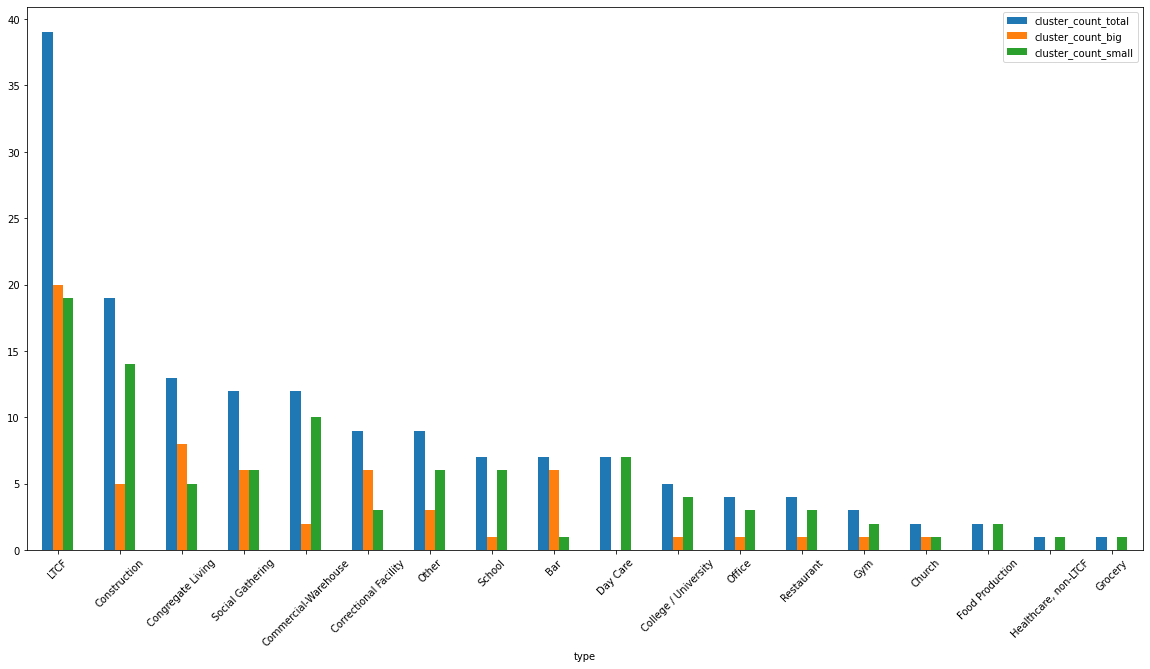

In [27]:
# Create a bar chart here of side-by-side cluster sizes
clusters_by_type.plot(kind = 'bar', x = 'type', y = ['cluster_count_total', 'cluster_count_big', 'cluster_count_small'], figsize = (20,10))
plt.xticks(rotation = 45);

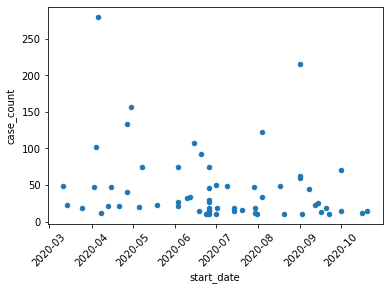

In [28]:
# Are the sizes of big clusters changing over time?
clusters.plot(kind = 'scatter', x = 'start_date', y = 'case_count')
plt.xticks(rotation = 45);

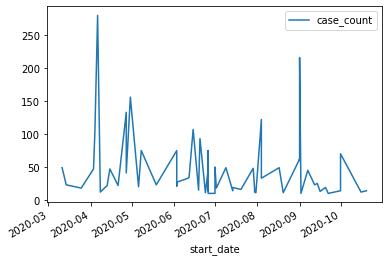

In [29]:
# Create a bar chart of clusters over time
clusters.plot(kind = 'line', x = 'start_date', y = 'case_count');

In [30]:
clusters_by_type.to_csv('../data/clusters_by_type_cleaned.csv')

### Read in the COVID-19 reported violations dataframe

In [31]:
# Since I need to update a couple of items, reading this in as a pandas dataframe
violations = pd.read_csv('../data/covid_violations.csv')
violations.head()

,request_no,datetime_opened,contact_type,address,city,zip,lat,long,coord
0,346122,04/15/2020 11:33:26 AM,NaN,928 6th Ave S,NASHVILLE,37203.0,36.149040,-86.772273,"(36.1490396, -86.77227289999999)"
1,339374,04/04/2020 06:13:59 PM,NaN,500 Gallatin Ave,NASHVILLE,37206.0,36.181548,-86.749695,"(36.181548, -86.749695)"
2,343513,04/10/2020 10:40:08 AM,NaN,5720 Crossings Blvd,NaN,NaN,36.039608,-86.646541,"(36.039608, -86.646541)"
3,442996,08/12/2020 02:05:29 AM,NaN,7689 Hwy 70 S,NASHVILLE,37221.0,36.078933,-86.953400,"(36.07893290000001, -86.9533998)"
4,339423,04/04/2020 08:12:27 PM,NaN,5310 Mt View Rd,ANTIOCH,37013.0,36.048182,-86.648447,"(36.0481819, -86.6484474)"


In [32]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11630 entries, 0 to 11629
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   request_no       11630 non-null  int64  
 1   datetime_opened  11630 non-null  object 
 2   contact_type     46 non-null     object 
 3   address          11256 non-null  object 
 4   city             10651 non-null  object 
 5   zip              10716 non-null  float64
 6   lat              11352 non-null  float64
 7   long             11352 non-null  float64
 8   coord            11352 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 817.9+ KB


In [33]:
# Create a new datetime field for the date a violation was reported
violations['date_opened'] = violations['datetime_opened'].str[:10]

In [34]:
# Convert that field into datetime format
violations['date_opened'] = pd.to_datetime(violations['date_opened'], errors = 'raise')

In [35]:
# Check the datatypes
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11630 entries, 0 to 11629
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   request_no       11630 non-null  int64         
 1   datetime_opened  11630 non-null  object        
 2   contact_type     46 non-null     object        
 3   address          11256 non-null  object        
 4   city             10651 non-null  object        
 5   zip              10716 non-null  float64       
 6   lat              11352 non-null  float64       
 7   long             11352 non-null  float64       
 8   coord            11352 non-null  object        
 9   date_opened      11630 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 908.7+ KB


In [36]:
# Check out the coordinates that have 15 violations but only 3 locations
violations[violations['coord'] == '(36.15658331160417, -86.78745279999998)']

,request_no,datetime_opened,contact_type,address,city,zip,lat,long,coord,date_opened
154,407584,07/04/2020 03:21:22 PM,NaN,NaN,NASHVILLE,37203.0,36.156583,-86.787453,"(36.15658331160417, -86.78745279999998)",2020-07-04
256,371422,05/19/2020 12:51:30 PM,NaN,NaN,NASHVILLE,37203.0,36.156583,-86.787453,"(36.15658331160417, -86.78745279999998)",2020-05-19
3466,426346,07/25/2020 01:34:33 AM,NaN,NaN,NASHVILLE,37203.0,36.156583,-86.787453,"(36.15658331160417, -86.78745279999998)",2020-07-25
3685,435255,08/01/2020 11:45:05 PM,NaN,NaN,NASHVILLE,37203.0,36.156583,-86.787453,"(36.15658331160417, -86.78745279999998)",2020-08-01
5751,392946,06/16/2020 02:37:13 AM,NaN,NaN,NASHVILLE,37203.0,36.156583,-86.787453,"(36.15658331160417, -86.78745279999998)",2020-06-16
6000,422255,07/21/2020 05:49:58 PM,NaN,NaN,NASHVILLE,37203.0,36.156583,-86.787453,"(36.15658331160417, -86.78745279999998)",2020-07-21
6814,414143,07/12/2020 05:22:15 AM,NaN,NaN,NASHVILLE,37203.0,36.156583,-86.787453,"(36.15658331160417, -86.78745279999998)",2020-07-12
7134,413993,07/11/2020 06:03:58 PM,NaN,NaN,NASHVILLE,37203.0,36.156583,-86.787453,"(36.15658331160417, -86.78745279999998)",2020-07-11
7442,407505,07/04/2020 04:13:40 AM,NaN,NaN,NASHVILLE,37203.0,36.156583,-86.787453,"(36.15658331160417, -86.78745279999998)",2020-07-04
7478,407502,07/04/2020 03:55:16 AM,NaN,NaN,NASHVILLE,37203.0,36.156583,-86.787453,"(36.15658331160417, -86.78745279999998)",2020-07-04


_These all appear to be generic 'Broadway' references. Since we're going to be matching locations from the Google API by address, I'm still leaving the addresses in in the following new dataframe subsets._

In [37]:
violations.to_csv('../data/violations_cleaned.csv', index = False)

In [38]:
# Create a new dataframe with a count of violations by coordinates
violations_by_loc = violations.groupby(['long', 'lat', 'address']).count()
# Sort the dataframe and take a look at the top-50 results
violations_by_loc = violations_by_loc.sort_values(['request_no'], ascending = False)
violations_by_loc.head(50)

,,,request_no,datetime_opened,contact_type,city,zip,coord,date_opened
long,lat,address,,,,,,,
-86.782000,36.163000,210 Anne Dallas Dudley Blvd,268,268,1,261,261,268,268
-86.774605,36.195731,21B Fern Ave,112,112,0,107,107,112,112
-86.782343,36.170861,717 3rd Ave N,38,38,0,38,38,38,38
-86.774621,36.195585,21A Fern Ave,32,32,0,28,28,32,32
-86.778476,36.167262,1 Public Sq,28,28,0,28,28,28,28
-86.776781,36.162544,333 Commerce St,24,24,0,24,24,24,24
-86.787453,36.156583,Broadway,23,23,0,23,23,23,23
-86.747059,36.184381,711 Gallatin Ave,20,20,0,20,20,20,20
-86.651201,36.264297,1200 Donelson Ave,20,20,0,20,20,20,20


In [39]:
# Clean up the dataframe
violations_by_loc = violations_by_loc.drop(['datetime_opened', 'contact_type', 'city', 'zip', 'coord', 'date_opened'], axis = 1)

In [40]:
violations_by_loc.reset_index(inplace = True)
violations_by_loc.head()

,long,lat,address,request_no
0,-86.782000,36.163000,210 Anne Dallas Dudley Blvd,268
1,-86.774605,36.195731,21B Fern Ave,112
2,-86.782343,36.170861,717 3rd Ave N,38
3,-86.774621,36.195585,21A Fern Ave,32
4,-86.778476,36.167262,1 Public Sq,28


In [41]:
violations_by_loc.to_csv('../data/violations_by_loc.csv', index = False)

In [42]:
violations_by_date = violations.groupby(['date_opened']).count()
# Sort the dataframe and take a look at the top-50 results
violations_by_date = violations_by_date.sort_values(['request_no'], ascending = False)
violations_by_date.head(50)

,request_no,datetime_opened,contact_type,address,city,zip,lat,long,coord
date_opened,,,,,,,,,
2020-04-03,266,266,3,209,188,194,209,209,209
2020-04-02,247,247,2,167,160,174,167,167,167
2020-04-06,219,219,0,218,201,219,219,219,219
2020-04-01,206,206,0,125,114,123,124,124,124
2020-08-02,193,193,0,190,184,184,191,191,191
2020-08-03,171,171,0,171,153,153,171,171,171
2020-04-07,147,147,0,145,137,147,147,147,147
2020-07-02,132,132,1,129,128,128,130,130,130
2020-07-14,130,130,0,126,122,122,128,128,128


In [43]:
# Clean up the dataframe
violations_by_date.reset_index(inplace = True)
violations_by_date = violations_by_date.drop(['datetime_opened', 'contact_type', 'address', 'city', 'zip', 'lat', 'long'], axis = 1)
violations_by_date.head()

,date_opened,request_no,coord
0,2020-04-03,266,209
1,2020-04-02,247,167
2,2020-04-06,219,219
3,2020-04-01,206,124
4,2020-08-02,193,191


In [44]:
violations_by_date.columns = ['date_opened', 'total_violations', 'total_num_w_coords']
violations_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_opened         222 non-null    datetime64[ns]
 1   total_violations    222 non-null    int64         
 2   total_num_w_coords  222 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 5.3 KB


In [45]:
violations_by_date.to_csv('../data/violations_by_date.csv', index = False)

In [46]:
# Create a new dataframe with a count of violations by coordinates
violations_by_loc_and_date = violations.groupby(['long', 'lat', 'address', 'date_opened']).count()
# Sort the dataframe and take a look at the top-50 results
violations_by_loc_and_date = violations_by_loc_and_date.sort_values(['request_no'], ascending = False)
violations_by_loc_and_date.head(50)

request_no  datetime_opened  contact_type  city  zip  coord
long       lat       address                      date_opened                                                             
-86.774605 36.195731 21B Fern Ave                 2020-08-02           68               68             0    67   67     68
                                                  2020-08-03           32               32             0    28   28     32
-86.774621 36.195585 21A Fern Ave                 2020-08-02           17               17             0    17   17     17
                                                  2020-08-03           11               11             0     7    7     11
-86.782000 36.163000 210 Anne Dallas Dudley Blvd  2020-07-14            9                9             0     9    9      9
-86.786437 36.153514 1212 Laurel St               2020-04-11            8                8             0     8    8      8
-86.776781 36.162544 333 Commerce St              2020-05-21            8                8             0     8    8      8
-86.711636 36.127215 1084 US-41                   2020-06-27            7                7             0     7    7      7
-86.790527 36.153047 1524 Demonbreun St           2020-08-05            6                6             0     6    6      6
-86.776765 36.162282 333 Commerce St              2020-05-21            6                6             0     6    6      6
-86.924964 36.072731 7097 Old Harding Pike        2020-10-16            6                6             0     6    6      6
-86.782000 36.163000 210 Anne Dallas Dudley Blvd  2020-07-18            6                6             0     6    6      6
                                                  2020-04-05            5                5             0     5    5      5
-86.775726 36.161446 221 Broadway                 2020-06-13            5                5             0     5    5      5
-86.790527 36.153047 1524 Demonbreun St           2020-08-04            5                5             0     5    5      5
-86.803206 36.235362 3301 Knight Dr               2020-10-26            5                5             0     5    5      5
-86.776781 36.162544 333 Commerce St              2020-05-20            5                5             0     5    5      5
-86.777727 36.167608 101 James Robertson Pkwy     2020-10-12            5                5             0     5    5      5
-86.699898 36.296005 1789B Gallatin Pike N        2020-04-01            5                5             0     5    5      5
-86.782000 36.163000 210 Anne Dallas Dudley Blvd  2020-04-22            5                5             0     5    5      5
                                                  2020-04-08            5                5             0     5    5      5
                                                  2020-07-20            5                5             0     5    5      5
                                                  2020-07-04            5                5             0     5    5      5
                                                  2020-05-05            5                5             0     5    5      5
                                                  2020-06-26            4                4             0     4    4      4
-86.917717 36.133598 5838 River Rd                2020-07-07            4                4             0     4    4      4
-86.782000 36.163000 210 Anne Dallas Dudley Blvd  2020-07-25            4                4             0     4    4      4
-86.775726 36.161446 221 Broadway                 2020-06-14            4                4             0     3    3      4
-86.782000 36.163000 210 Anne Dallas Dudley Blvd  2020-07-02            4                4             0     4    4      4
                                                  2020-09-03            4                4             0     4    4      4
                                                  2020-06-21            4                4             0     4    4      4
-86.

In [47]:
# Clean up the dataframe
violations_by_loc_and_date = violations_by_loc_and_date.drop(['datetime_opened', 'contact_type', 'city', 'zip', 'coord'], axis = 1)
violations_by_loc_and_date.reset_index(inplace = True)
violations_by_loc_and_date.head()

,long,lat,address,date_opened,request_no
0,-86.774605,36.195731,21B Fern Ave,2020-08-02,68
1,-86.774605,36.195731,21B Fern Ave,2020-08-03,32
2,-86.774621,36.195585,21A Fern Ave,2020-08-02,17
3,-86.774621,36.195585,21A Fern Ave,2020-08-03,11
4,-86.782000,36.163000,210 Anne Dallas Dudley Blvd,2020-07-14,9


In [48]:
violations_by_loc_and_date.to_csv('../data/violations_by_loc_and_date.csv', index = False)